In [1]:
import warnings

# 경고 메시지 표시 안함
warnings.filterwarnings(action='ignore')

영화 리뷰 텍스트 분석하기

In [2]:
import pandas as pd

# 훈련용 데이터 준비하기
nsmc_train_df = pd.read_csv(
    'data/ratings_train.txt', encoding='utf-8', sep='\t', engine='python')
nsmc_train_df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [3]:
nsmc_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [4]:
# document가 non-null인 샘플만 다시 저장
nsmc_train_df = nsmc_train_df[nsmc_train_df['document'].notnull()]
nsmc_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149995 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        149995 non-null  int64 
 1   document  149995 non-null  object
 2   label     149995 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [5]:
# 감성 분류 확인(0: 부정, 1: 긍정)
nsmc_train_df['label'].value_counts()

0    75170
1    74825
Name: label, dtype: int64

In [6]:
import re

# 한글 이외의 문자는 공백으로 치환하기
nsmc_train_df['document'] = nsmc_train_df['document'].apply(
    lambda x: re.sub(r'[^ㄱ-ㅣ가-힣]+', ' ', x))  # 모음 ㅣ (or의 | 아님)
nsmc_train_df.head()

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다 평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [7]:
# 평가용 데이터 준비하기
nsmc_test_df = pd.read_csv(
    'data/ratings_test.txt', encoding='utf-8', sep='\t', engine='python')
nsmc_test_df.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [8]:
nsmc_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        50000 non-null  int64 
 1   document  49997 non-null  object
 2   label     50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [9]:
# document가 non-null인 샘플만 다시 저장
nsmc_test_df = nsmc_test_df[nsmc_test_df['document'].notnull()]
nsmc_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49997 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        49997 non-null  int64 
 1   document  49997 non-null  object
 2   label     49997 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


In [10]:
# 감성 분류 확인(0: 부정, 1: 긍정)
nsmc_test_df['label'].value_counts()

1    25171
0    24826
Name: label, dtype: int64

In [11]:
# 한글 이외의 문자는 공백으로 치환하기
nsmc_test_df['document'] = nsmc_test_df['document'].apply(
    lambda x: re.sub(r'[^ㄱ-ㅣ가-힣]+', ' ', x))  # 모음 ㅣ (or의 | 아님)
nsmc_test_df.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,,0
2,8544678,뭐야 이 평점들은 나쁘진 않지만 점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임 돈주고 보기에는,0
4,6723715,만 아니었어도 별 다섯 개 줬을텐데 왜 로 나와서 제 심기를 불편하게 하죠,0


In [12]:
from konlpy.tag import Okt

okt = Okt()  # 객체 생성


def okt_tokenizer(text):
    tokens = okt.morphs(text)  # 형태소 단위로 토큰화 작업
    return tokens

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 토큰 생성기(tokenizer) : okt_tokenizer() 함수
# 토큰의 단어 크기(ngram_range) : 1~2개의 단어
# 최소 출현 빈도(min_df) : 3번 이상
# 최대 출현 빈도(max_df) : 90% 이하
tfidf = TfidfVectorizer(tokenizer=okt_tokenizer,
                        ngram_range=(1, 2), min_df=3, max_df=0.9)

# 벡터화할 데이터 내부 설정값 조정
tfidf.fit(nsmc_train_df['document'])

# 데이터를 벡터로 변환
nsmc_train_tfidf = tfidf.transform(nsmc_train_df['document'])

In [14]:
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델 사용(긍정, 부정의 이진 분류 모델 구축)
SA_lr = LogisticRegression(random_state=0)  # 객체 생성

# 설정값 조절 fit()
# 독립변수 X = nsmc_train_tfidf, 종속변수 Y = nsmc_train_df['label']
SA_lr.fit(nsmc_train_tfidf, nsmc_train_df['label'])

LogisticRegression(random_state=0)

In [15]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 매개변수 : C
# C에 대해 비교 검사할 값 : 1, 3, 3.5, 4, 4.5, 5
params = {'C': [1, 3, 3.5, 4, 4.5, 5]}

# 교차 검증(cv) : 3
# 모형 비교 기준(scoring) : 정확도(accuracy)
# verbose : 함수 수행시 발생하는 상세한 정보들 출력
# 0 : 출력하지 않음 / 1 : 자세히 출력 / 2 : 함축적인 정보만 출력
SA_lr_grid_cv = GridSearchCV(
    SA_lr, param_grid=params, cv=3, scoring='accuracy', verbose=1)  # 객체 생성

# 설정값 조절 fit()
# 독립변수 X = nsmc_train_tfidf, 종속변수 Y = nsmc_train_df['label']
SA_lr_grid_cv.fit(nsmc_train_tfidf, nsmc_train_df['label'])

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [1, 3, 3.5, 4, 4.5, 5]}, scoring='accuracy',
             verbose=1)

In [16]:
print('최적의 C 매개변수 =', SA_lr_grid_cv.best_params_,
      ', 최고 점수 =', round(SA_lr_grid_cv.best_score_, 4))

최적의 C 매개변수 = {'C': 3} , 최고 점수 = 0.8553


In [17]:
# 최적 매개변수가 설정된 모형을 저장
SA_lr_best = SA_lr_grid_cv.best_estimator_

# 평가용 데이터를 tfidf 객체 적용하여 벡터로 변환
nsmc_test_tfidf = tfidf.transform(nsmc_test_df['document'])

# SA_lr_best에 nsmc_test_tfidf 벡터를 사용하여 감성 예측
test_predict = SA_lr_best.predict(nsmc_test_tfidf)

In [19]:
from sklearn.metrics import accuracy_score

# 평가용 데이터 감성 결과값(nsmc_test_df['label'])과
# 감성 예측값(test_predict)을 기반으로 정확도 계산
print('감성 분석 정확도 =', round(accuracy_score(
    nsmc_test_df['label'], test_predict), 3))

감성 분석 정확도 = 0.858


In [20]:
st = input('감성 분석할 문장 입력 >>')

In [21]:
# 입력 텍스트에 대한 전처리
st = re.compile(r'[ㄱ-ㅣ가-힣]+').findall(st)
print(st)

st = [' '.join(st)]
print(st)

['재밌어요']
['재밌어요']


In [22]:
# 입력 텍스트의 벡터화
st_tfidf = tfidf.transform(st)

# 최적 감성 분석 모델에 적용하여 감성 예측
st_predict = SA_lr_best.predict(st_tfidf)
# print(st_predict)

In [23]:
# 예측값 확인하기
if(st_predict == 0):
    print(st, '→ 부정')
else:
    print(st, '→ 긍정')

['재밌어요'] → 긍정


코로나 뉴스 텍스트 분석하기

In [24]:
import json

with open('data/corona_naver_news.json', encoding='utf-8') as corona:
    data = json.load(corona)
    
# print(data)

In [25]:
data_title = []
data_description = []

for i in data:
    data_title.append(i['title'])
    data_description.append(i['description'])

# print(data_title)
# print('='*100)
# print(data_description)

In [26]:
data_df = pd.DataFrame({'title': data_title, 'description': data_description})
print(data_df)

                                                 title  \
0        결국 '증세론' 먼저 꺼내든 與…&quot;증세없는 '기본소득' 불가능&quot;   
1                               창녕군, ‘창녕형’비대면 선별진료소 운영   
2                         DK모바일, 메인 홍보 모델로 AOA '설현' 선정   
3         김병민 &quot;기본소득도 필요하면 논의 테이블에 올려야&quot; [인터뷰]   
4                              이재갑 장관, 고용안정지원금 서울센터 방문   
..                                                 ...   
795  [세계의 눈] &quot;<b>코로나</b>19 영향, 현대차 매출 큰 타격&quo...   
796                   중부발전, 소규모 태양광사업자 REC 판매대금 '선 지급'   
797  &quot;<b>코로나</b> 함께 극복&quot;…박종환 자유총연맹 총재, 캠페인 참여   
798             치과의사 7000명 모이는 행사 앞두고 치협 회장 “행사 취소해달라”   
799                        [IS포토|대종상영화제] 문가영, '발랄 듬~뿍'   

                                           description  
0    <b>코로나</b>발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만, 국세 수입은 ...  
1    ▲ 지난 2일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다...  
2    한편, ‘설현’은 최근 <b>코로나</b>19 바이러스를 다룬, MBC ‘시리즈M’...  
3    변화의 핵심 중에서는 우리 사회가 신종 <b>코로나</b>바이러스 감염증(<b>코로...  
4     이재갑 고용노동부 장관

In [27]:
# title
# 분석할 데이터의 벡터화
data_title_tfidf = tfidf.transform(data_df['title'])

# 최적 감성 분석 모델에 적용하여 감성 예측
data_title_predict = SA_lr_best.predict(data_title_tfidf)

# 감성 분석 결과값을 데이터프레임에 저장
data_df['title_label'] = data_title_predict

print(data_df['title_label'].value_counts())

0    484
1    316
Name: title_label, dtype: int64


In [28]:
# description
# 분석할 데이터의 벡터화
data_description_tfidf = tfidf.transform(data_df['description'])

# 최적 감성 분석 모델에 적용하여 감성 예측
data_description_predict = SA_lr_best.predict(data_description_tfidf)

# 감성 분석 결과값을 데이터프레임에 저장
data_df['description_label'] = data_description_predict

print(data_df['description_label'].value_counts())

0    424
1    376
Name: description_label, dtype: int64


In [47]:
# 한글 이외의 문자는 공백으로 치환하기
data_df['title'] = data_df['title'].apply(
    lambda x: re.sub(r'[^ㄱ-ㅣ가-힣]+', ' ', x))

data_df['description'] = data_df['description'].apply(
    lambda x: re.sub(r'[^ㄱ-ㅣ가-힣]+', ' ', x))

data_df.head()

c:\Users\admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,title,description,title_label,description_label
0,결국 증세론 먼저 꺼내든 증세없는 기본소득 불가능,코로나 발 경제 위기 대응을 위해 돈 쓸 곳은 늘어났지만 국세 수입은 줄어들면서 ...,0,0
1,창녕군 창녕형 비대면 선별진료소 운영,지난 일 창녕군보건소 앞에 설치한 선별진료소에서 검사자가 체온을 측정하고 있다 사...,0,0
2,모바일 메인 홍보 모델로 설현 선정,한편 설현 은 최근 코로나 바이러스를 다룬 시리즈 세계적 유행 에서 다큐멘터리 내레...,0,0
3,김병민 기본소득도 필요하면 논의 테이블에 올려야 인터뷰,변화의 핵심 중에서는 우리 사회가 신종 코로나 바이러스 감염증 코로나 의 위기를 마...,0,1
4,이재갑 장관 고용안정지원금 서울센터 방문,이재갑 고용노동부 장관은 월 일 수 시에 코로나 긴급 고용안정지원금 서울 센터 서...,0,0


In [48]:
data_df.to_csv('data/corona_naver_news.csv', encoding='utf-8-sig')

c:\Users\admin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
# 긍정, 부정 분리 후 비교 분석
columns_name = ['title', 'title_label', 'description', 'description_label']
negative_data_df = pd.DataFrame(columns=columns_name)
positive_data_df = pd.DataFrame(columns=columns_name)

for i, data in data_df.iterrows():
    title = data['title']
    description = data['description']
    t_label = data['title_label']
    d_label = data['description_label']

    if d_label == 0:  # 부정만 추출
        negative_data_df = negative_data_df.append(pd.DataFrame(
            [[title, t_label, description, d_label]], columns=columns_name), ignore_index=True)
    else:  # 긍정만 추출
        positive_data_df = positive_data_df.append(pd.DataFrame(
            [[title, t_label, description, d_label]], columns=columns_name), ignore_index=True)

print('negative =', len(negative_data_df), ', positive =', len(positive_data_df))

negative = 424 , positive = 376


In [30]:
# positive
# 명사 형태소만 추출하기
positive_description = positive_data_df['description']
positive_description_noun = []

for i in positive_description:
    positive_description_noun.append(okt.nouns(i))
    
# print(positive_description_noun)

positive_description_noun_join = []

# 길이가 1보다 큰 토큰만 추출한 후 연결하여 리스트 구성
for i in positive_description_noun:
    upperoneletter = [word for word in i if len(word) > 1]
    positive_description_noun_join.append(' '.join(upperoneletter))

# print(positive_description_noun_join)

In [31]:
# negative
# 명사 형태소만 추출하기
negative_description = negative_data_df['description']
negative_description_noun = []

for i in negative_description:
    negative_description_noun.append(okt.nouns(i))
    
# print(negative_description_noun)

negative_description_noun_join = []

# 길이가 1보다 큰 토큰만 추출한 후 연결하여 리스트 구성
for i in negative_description_noun:
    upperoneletter = [word for word in i if len(word) > 1]
    negative_description_noun_join.append(' '.join(upperoneletter))

# print(negative_description_noun_join)

In [32]:
# positive
positive_tfidf = TfidfVectorizer(tokenizer=okt_tokenizer, min_df=2)
positive_dtm = positive_tfidf.fit_transform(positive_description_noun_join)
positive_voca = dict()

# dtm 단어(get_feature_names())마다 컬럼의 합(getcol(i).sum())을 구하여
# 단어별 tfidf값의 합을 구하기
for i, word in enumerate(positive_tfidf.get_feature_names()):
    positive_voca[word] = positive_dtm.getcol(i).sum()

# 내림차순(reverse=True)으로 정렬하기
positive_words = sorted(positive_voca.items(),
                        key=lambda x: x[1], reverse=True)

# print(positive_words)

In [33]:
# negative
negative_tfidf = TfidfVectorizer(tokenizer=okt_tokenizer, min_df=2)
negative_dtm = negative_tfidf.fit_transform(negative_description_noun_join)
negative_voca = dict()

# dtm 단어(get_feature_names())마다 컬럼의 합(getcol(i).sum())을 구하여
# 단어별 tfidf값의 합을 구하기
for i, word in enumerate(negative_tfidf.get_feature_names()):
    negative_voca[word] = negative_dtm.getcol(i).sum()

# 내림차순(reverse=True)으로 정렬하기
negative_words = sorted(negative_voca.items(),
                        key=lambda x: x[1], reverse=True)

# print(negative_words)

In [34]:
positive_words_wc = dict(positive_words[:100])
print(positive_words_wc)

{'코로나': 30.077425384393997, '의료': 13.730856265320103, '위해': 11.465875721279344, '바이러스': 10.407290205568316, '신종': 9.961781388438851, '감염증': 9.569899334069223, '온라인': 7.967750239490169, '시대': 7.657189669590375, '확산': 7.306983652951232, '이번': 7.227886214453049, '사회': 7.220291094764435, '지역': 6.975940093632284, '통해': 6.80413547451489, '어려움': 6.566891133100553, '기업': 6.199629773408189, '포스트': 6.075669018817756, '극복': 5.969640186663357, '최근': 5.510469228256, '방역': 5.46936100626191, '서울': 5.441065729216821, '환자': 5.370318002770295, '사태': 5.227882457110082, '상황': 5.192562430409998, '경제': 5.187992764411258, '언택트': 5.18490588512069, '대표': 5.113310410010968, '정부': 5.099752398079552, '생활': 5.029325309308453, '한국': 4.988661289991707, '공연': 4.97295980461838, '올해': 4.940582759099085, '우리': 4.932859475173646, '사업': 4.925369715922323, '개발': 4.881469473023533, '대응': 4.86408041682691, '오후': 4.756740651038557, '진자': 4.61342883890833, '콘서트': 4.574862294030844, '비대': 4.513005667474554, '이후': 4.453801116259

In [35]:
negative_words_wc = dict(negative_words[:100])
print(negative_words_wc)

{'코로나': 34.33164055974099, '바이러스': 15.321751669293597, '신종': 13.883873318574295, '감염증': 13.684706908838967, '위해': 11.793650974243455, '확산': 9.695809335612335, '대종상영화제': 9.162254710103765, '사태': 8.681364169839203, '진행': 8.233243592338386, '지역': 7.884816390865208, '방역': 7.677387404057251, '지난': 7.597223689714275, '참석': 7.414779828716485, '진자': 7.074301088728933, '감염': 6.984603544547963, '지원': 6.929332537634364, '이번': 6.767744999819675, '여파': 6.690196937447112, '예방': 6.554954210536716, '경제': 5.584894987390672, '최근': 5.3950588899654015, '생활': 5.103924736007104, '서울': 4.927461435592093, '행사': 4.924865052522257, '장기': 4.872166461656493, '가운데': 4.8036472003804, '어려움': 4.760372854746068, '이후': 4.7517660801144475, '정부': 4.707596549444763, '상황': 4.686098683369752, '시장': 4.643454398253694, '위기': 4.637352060530917, '운영': 4.525318163158156, '로봇': 4.522995279069899, '클라우드': 4.481052213754701, '마스크': 4.464396584160662, '대한': 4.443423108884559, '극복': 4.436783676764412, '대응': 4.428950487724625, '발생': 4

In [36]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fm.get_fontconfig_fonts()
font_location = 'c:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

max_chart = 15  # bar chart에 나타낼 단어의 수

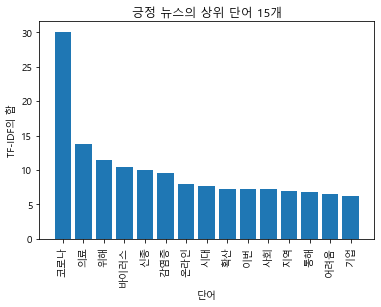

In [37]:
# positive bar chart
plt.bar(range(max_chart), [i[1] for i in positive_words[:max_chart]])
plt.title('긍정 뉴스의 상위 단어 %d개' % max_chart)
plt.xlabel('단어')
plt.ylabel('TF-IDF의 합')
plt.xticks(range(max_chart), [i[0] for i in positive_words[:max_chart]], rotation=90)
plt.show()

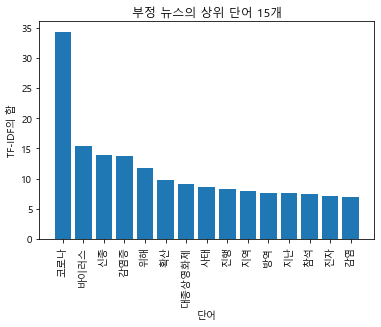

In [38]:
# nagative bar chart
plt.bar(range(max_chart), [i[1] for i in negative_words[:max_chart]])
plt.title('부정 뉴스의 상위 단어 %d개' % max_chart)
plt.xlabel('단어')
plt.ylabel('TF-IDF의 합')
plt.xticks(range(max_chart), [i[0] for i in negative_words[:max_chart]], rotation=90)
plt.show()

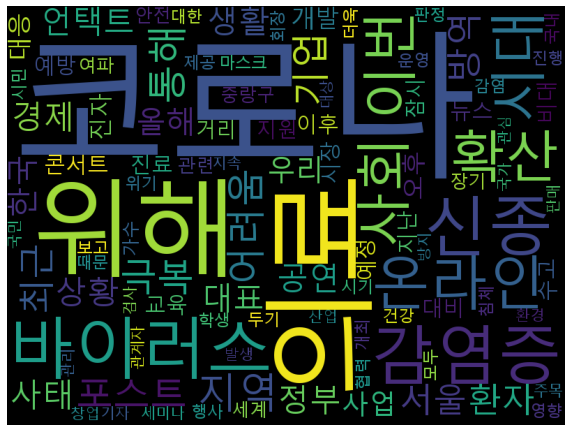

In [39]:
from wordcloud import WordCloud

wc = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf', background_color='black',
               width=800, height=600)

# positive wordcloud
positive_cloud = wc.generate_from_frequencies(positive_words_wc)

plt.figure(figsize=(10, 10))
plt.imshow(positive_cloud)
plt.axis('off')
plt.show()

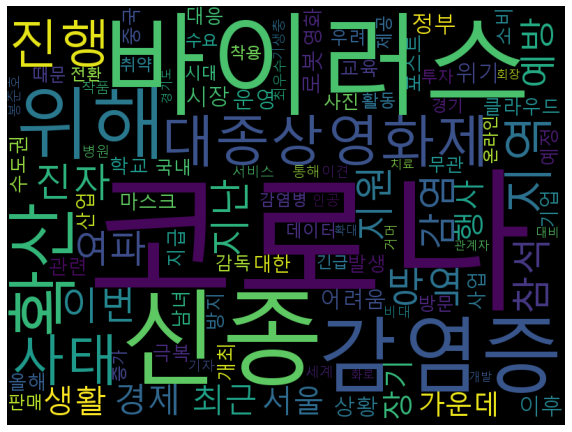

In [40]:
# negative wordcloud
negative_cloud = wc.generate_from_frequencies(negative_words_wc)

plt.figure(figsize=(10, 10))
plt.imshow(negative_cloud)
plt.axis('off')
plt.show()